In [1]:
import os
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype
import math
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [3]:
pwd = os.getcwd()
pwd

'/Users/mnoordeen/Downloads/CART, RF and Adaboost'

In [4]:
#os.chdir('csv_files')

FileNotFoundError: [Errno 2] No such file or directory: 'csv_files'

In [5]:
#1
#Kaggle dataset - Automobile_data.csv

In [6]:
df_raw = pd.read_csv('Automobile_data.csv', low_memory=False)

In [8]:
df_raw.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df_raw.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
df_raw = df_raw.replace('?', np.nan)

In [21]:
df_raw.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
df_raw.to_csv("Automobile_data_processed.csv",index=False)

In [9]:
# Extract all string-type columns
col_string = []
for col in df_raw:
    if is_string_dtype(df_raw[col]):
        col_string.append(col)
print("String type columns: ", col_string)
    

String type columns:  ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [10]:
# convert following columns to continuous variables based on data description
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]

for i in cols:
    df_raw[i] = pd.to_numeric(df_raw[i], errors='raise')

In [11]:
# convert all string type variables to categorical variables
for i in df_raw:
    if is_string_dtype(df_raw[i]):
        df_raw[i] = df_raw[i].astype('category').cat.as_ordered()

In [12]:
df_raw[:3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [13]:
# Handle missing values: Basically speaking, we don't need to do anything for categorical variables, because pandas automatically convert NA to -1 for categorical variables. For continuous variables, we need to replace NA with mean or median. And create a col_NA column to indicate which row has NAs
for i in df_raw:
    if is_numeric_dtype(df_raw[i]):
        col_vals = df_raw[i]
        if(sum(col_vals.isnull())) != 0:
            df_raw[i + '_na'] = col_vals.isnull()
            df_raw[i] = col_vals.fillna(col_vals.median())

In [14]:
df_raw[:3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_na,bore_na,stroke_na,horsepower_na,peak-rpm_na,price_na
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,True,False,False,False,False,False
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,True,False,False,False,False,False
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,True,False,False,False,False,False


In [19]:
df_raw["make"] = df_raw["make"].astype('category')
df_raw["make"].cat.codes+1

0       1
1       1
2       1
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      4
19      4
20      4
21      5
22      5
23      5
24      5
25      5
26      5
27      5
28      5
29      5
       ..
175    20
176    20
177    20
178    20
179    20
180    20
181    20
182    21
183    21
184    21
185    21
186    21
187    21
188    21
189    21
190    21
191    21
192    21
193    21
194    22
195    22
196    22
197    22
198    22
199    22
200    22
201    22
202    22
203    22
204    22
Length: 205, dtype: int8

In [15]:
# Convert categorical variables to their numberic representations
for i in df_raw:
    if str(df_raw[i].dtype) == 'category':
        df_raw[i] = df_raw[i].cat.codes + 1


In [16]:
df_raw[:3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_na,bore_na,stroke_na,horsepower_na,peak-rpm_na,price_na
0,3,115.0,1,2,1,2,1,3,1,88.6,...,5000.0,21,27,13495.0,True,False,False,False,False,False
1,3,115.0,1,2,1,2,1,3,1,88.6,...,5000.0,21,27,16500.0,True,False,False,False,False,False
2,1,115.0,1,2,1,2,3,3,1,94.5,...,5000.0,19,26,16500.0,True,False,False,False,False,False


## Predict continuous variable - price

In [17]:
X = df_raw.drop('price', axis=1)
y = df_raw['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [18]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
def rmse(preds, actuals):
    return math.sqrt(((preds - actuals)**2).mean())

In [20]:
[rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val), m.score(X_train, y_train), m.score(X_val, y_val)]

[1258.2669345993172,
 2840.1813630590127,
 0.9756103837202775,
 0.8273931665455132]

## Predict categorical variable - symboling

In [21]:
X = df_raw.drop('symboling', axis=1)
y = df_raw['symboling']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [22]:
m = RandomForestClassifier(n_jobs = -1)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
print(m.score(X_train, y_train))
print(m.score(X_val, y_val))

1.0
0.8048780487804879


## Parameter tuning

In [24]:
# Tune three parameters: n_estimators, min_samples_leaf, and max_features
# This may take a while to run

numOfestimators = [1,5,10,15,20,25,30]
numOfleafs = [1, 3, 5, 10, 25]
numOffeatures = np.arange(0.1, 1.1, 0.1)
best_result = []
for NumOfEstimator in numOfestimators:
    for NumOfLeaf in numOfleafs:
        for NumOfFeature in numOffeatures:
            result = [NumOfEstimator, NumOfLeaf, NumOfFeature]
            m = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=NumOfEstimator, 
                                       min_samples_leaf=NumOfLeaf, 
                                       max_features=NumOfFeature)
            m.fit(X_train, y_train)
            result.append(m.score(X_train, y_train))
            result.append(m.score(X_val, y_val))
            if len(best_result) == 0:
                best_result = result
            elif best_result[4] < result[4]:
                print(result)
                best_result = result
print("The best result is", best_result)

[1, 1, 0.4, 0.8536585365853658, 0.6829268292682927]
[1, 1, 0.6, 0.8841463414634146, 0.7560975609756098]
[1, 5, 0.5, 0.7134146341463414, 0.7804878048780488]
[5, 1, 0.30000000000000004, 0.9878048780487805, 0.8048780487804879]
[10, 3, 0.9, 0.9512195121951219, 0.8292682926829268]
The best result is [10, 3, 0.9, 0.9512195121951219, 0.8292682926829268]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [1,5,10,15,20,25,30], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ], 
 'min_samples_leaf': [1, 3, 5, 10, 25], 'bootstrap': [True, False]}
]

forest = RandomForestClassifier(n_jobs=-1)

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

In [26]:
cvres = grid_search_forest.cv_results_

# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [27]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
#RMSE
from sklearn.metrics import mean_squared_error
grid_best=grid_search_forest.best_estimator_.predict(X_train)
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


In [30]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [31]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=99, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\my\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]},
          pre_dispatch='2*n_jobs', random_state=99, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [32]:
cvres2 = rf_random.cv_results_
# for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
#     print(np.sqrt(-mean_score), params)

In [33]:
# best random model 
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=23, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
# best combination of parameters of random search
rf_random.best_params_

{'max_depth': 23,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 65}

In [35]:
#this is the RMSE
random_best= rf_random.best_estimator_.predict(X_train)
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.22


In [36]:
#Feature importance

# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance               feature
0     0.086089     normalized-losses
1     0.084969            wheel-base
2     0.076657                 width
3     0.068705                height
4     0.068328          num-of-doors
5     0.065897                  make
6     0.064555           curb-weight
7     0.055423                length
8     0.053704                  bore
9     0.049788           highway-mpg
10    0.046874                 price
11    0.040111           engine-size
12    0.037191              city-mpg
13    0.033935            body-style
14    0.030962                stroke
15    0.030135     compression-ratio
16    0.027928              peak-rpm
17    0.024506            horsepower
18    0.017051           engine-type
19    0.010753           fuel-system
20    0.009572      num-of-cylinders
21    0.006473          drive-wheels
22    0.004397            aspiration
23    0.002216  normalized-losses_na
24    0.001401             stroke_na
25    0.000856             fuel-type
2

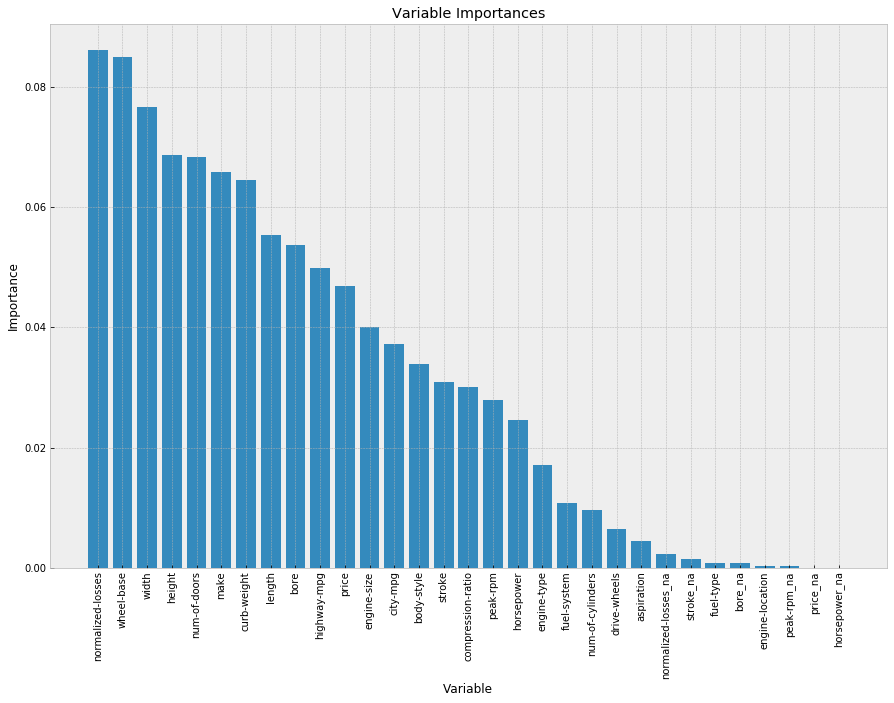

In [37]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [39]:
#Evaluate best model on the test set

final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_val)
final_mse = mean_squared_error(y_val, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.75
